In [12]:
# https://python-bloggers.com/2021/01/beginners-guide-predict-the-stock-market/
import warnings
warnings.filterwarnings("ignore")

In [13]:
# download data

In [14]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np

df=yf.download('TSLA',start='2020-01-07',  end='2021-01-07',progress=False)[['Close']]
df.head()

,Close
Date,
2020-01-07,93.811996
2020-01-08,98.428001
2020-01-09,96.267998
2020-01-10,95.629997
2020-01-13,104.972000


In [15]:
# create data set

In [16]:
df=pd.concat([df, df.shift(), df.shift(2),df.shift(3),df.shift(4),df.shift(5),
           df.shift(6),df.shift(7),df.shift(8),df.shift(9),df.shift(10)], axis=1).dropna()

df.columns=list(range(0,11))
df.rename(columns={0:'actual_stock_price'},inplace=True)

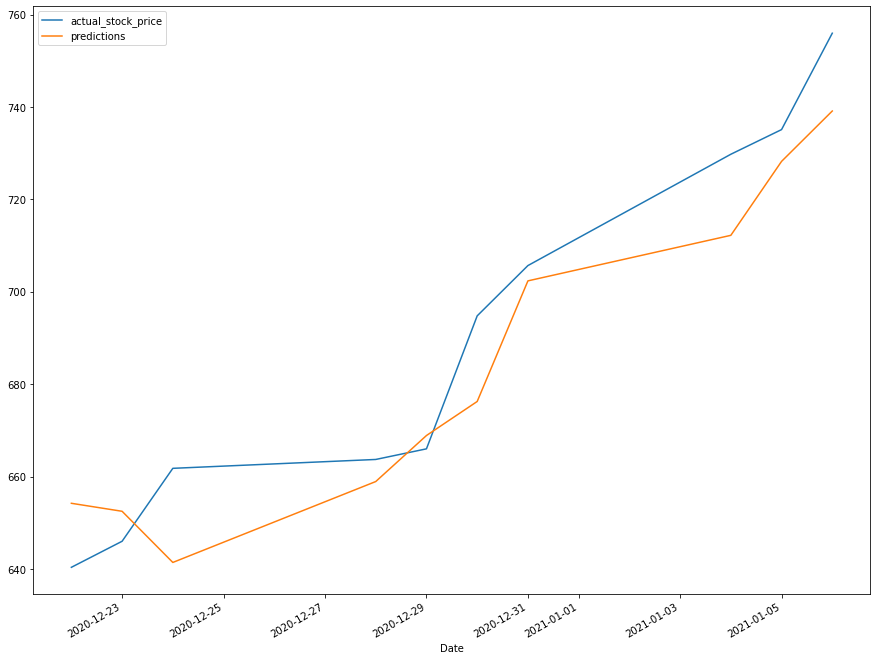

In [17]:
#split data into train and test. We will try to predict the last 10 days

train=df.head(len(df)-10)
test=df.tail(10)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train[list(range(1,11))],train['actual_stock_price'])

test['predictions']=lr.predict(test[list(range(1,11))])

ax=test[['actual_stock_price','predictions']].plot(figsize=(15,12))

In [18]:
# predict stock price of next 10 days
df=yf.download('TSLA',start='2020-01-07',  end='2021-01-07',progress=False)[['Close']]
train=df.head(len(df)-10)
test=df.tail(10)

train =pd.concat([train ,pd.DataFrame( {'Close':100},index=[train.tail(1).index[0]+datetime.timedelta(days=1)])])
train.tail()

,Close
2020-12-16,622.770020
2020-12-17,655.900024
2020-12-18,695.000000
2020-12-21,649.859985
2020-12-22,100.000000


<AxesSubplot:xlabel='Date'>

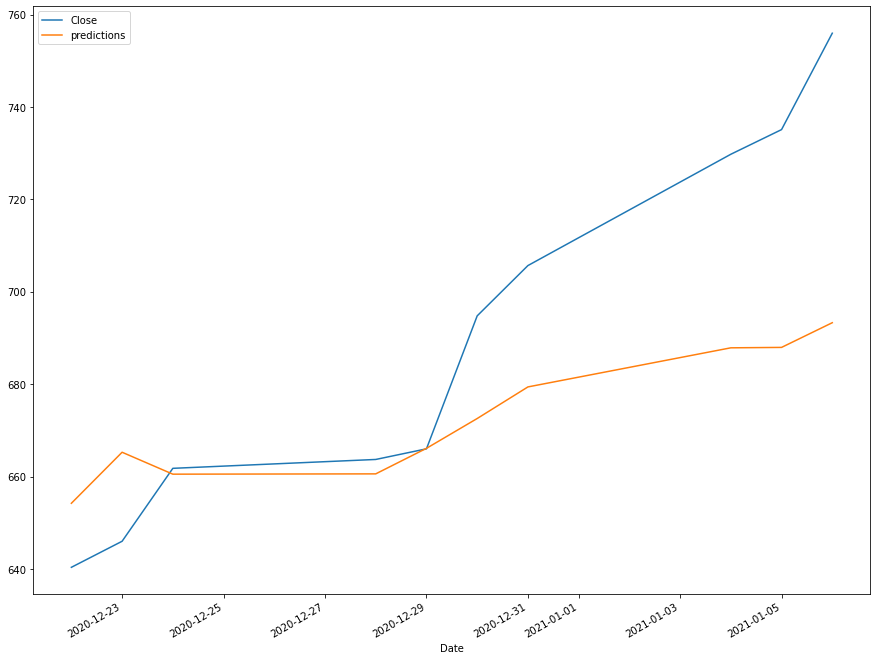

In [19]:
df=yf.download('TSLA',start='2020-01-07',  end='2021-01-07',progress=False)[['Close']]

train=df.head(len(df)-10)
test=df.tail(10)

predictions=[]
for i in range(0,10):
    x=pd.concat([train, train.shift(), train.shift(2),train.shift(3),train.shift(4),train.shift(5),
               train.shift(6),train.shift(7),train.shift(8),train.shift(9)], axis=1).dropna().tail(1)
    x.columns=range(1,11)
    pred=lr.predict(x)

    predictions.append(pred[0])
    train =pd.concat([train ,pd.DataFrame( {'Close':pred},index=[train.tail(1).index[0]+datetime.timedelta(days=1)])])
    
test['predictions']=predictions

test.plot(figsize=(15,12))

In [20]:
# build a function for prediction
def predictnextday(symbol):
    df=yf.download(symbol,start='2020-01-07',  end='2021-01-07',progress=False)[['Close']]
    df=pd.concat([df, df.shift(), df.shift(2),df.shift(3),df.shift(4),df.shift(5),
               df.shift(6),df.shift(7),df.shift(8),df.shift(9),df.shift(10)], axis=1).dropna()

    df.columns=list(range(0,11))
    df.rename(columns={0:'actual_stock_price'},inplace=True)
    train=df.head(len(df)-10)
    test=df.tail(10)

    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    lr.fit(train[list(range(1,11))],train['actual_stock_price'])

    test['predictions']=lr.predict(test.tail(10)[list(range(1,11))])

    ax=test[['actual_stock_price','predictions']].plot(figsize=(15,12))
    return(ax)

<AxesSubplot:xlabel='Date'>

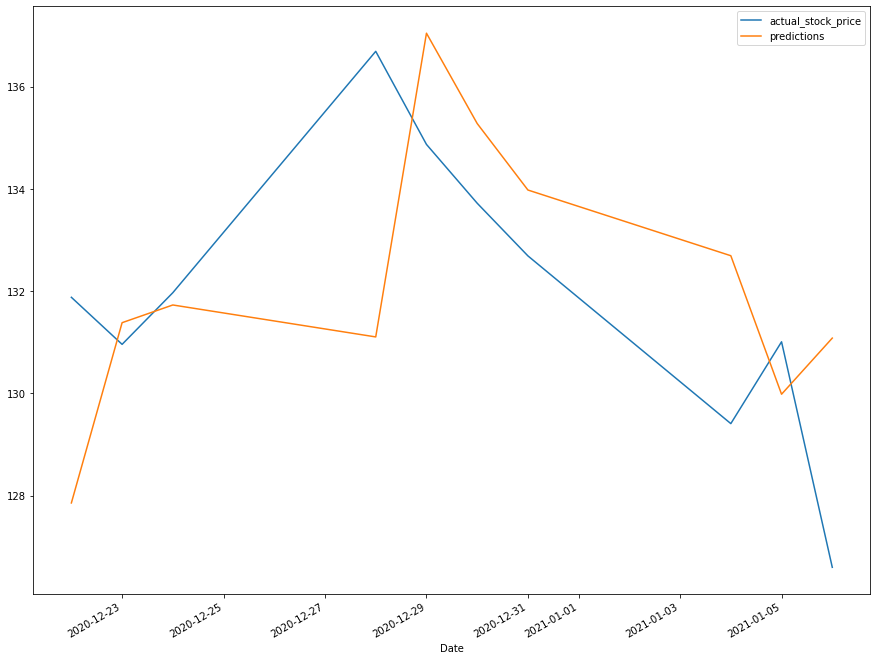

In [21]:
predictnextday('AAPL')